<a id='top'></a>

# CSCI 3022: Intro to Data Science - Spring 2019 Practicum 1
***

This practicum is due on Canvas by **11:59 PM on Monday March 4**. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  

**Here are the rules:** 

1. All work, code and analysis, must be your own. 
1. You may use your course notes, posted lecture slides, textbooks, in-class notebooks, and homework solutions as resources.  You may also search online for answers to general knowledge questions like the form of a probability distribution function or how to perform a particular operation in Python/Pandas. 
1. This is meant to be like a coding portion of your midterm exam. So, the instructional team will be much less helpful than we typically are with homework. For example, we will not check answers, help debug your code, and so on.
1. If something is left open-ended, it is because we want to see how you approach the kinds of problems you will encounter in the wild, where it will not always be clear what sort of tests/methods should be applied. Feel free to ask clarifying questions though.
2. You may **NOT** post to message boards or other online resources asking for help.
3. You may **NOT** copy-paste solutions *from anywhere*.
4. You may **NOT** collaborate with classmates or anyone else.
5. In short, **your work must be your own**. It really is that simple.

Violation of the above rules will result in an immediate academic sanction (*at the very least*, you will receive a 0 on this practicum or an F in the course, depending on severity), and a trip to the Honor Code Council.

**By submitting this assignment, you agree to abide by the rules given above.**

***

**Name**:  

***


**NOTES**: 

- You may not use late days on the practicums nor can you drop your practicum grades. 
- If you have a question for us, post it as a **PRIVATE** message on Piazza.  If we decide that the question is appropriate for the entire class, then we will add it to a Practicum clarifications thread. 
- Do **NOT** load or use any Python packages that are not available in Anaconda 3.6. 
- Some problems with code may be autograded.  If we provide a function API **do not** change it.  If we do not provide a function API then you're free to structure your code however you like. 
- Submit only this Jupyter notebook to Canvas.  Do not compress it using tar, rar, zip, etc. 
- This should go without saying, but... For any question that asks you to calculate something, you **must show all work to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit.

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Bottom](#bot)

---

In [2]:
from scipy import stats
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

<br>

---
[Back to top](#top)
<a id='p1'></a>

### [30 points] Problem 1: The Game of Strife

Below, and at the [link here](http://www.cs.colorado.edu/~tonyewong/home/resources/game_of_strife.png), you will find the board for the ***Game of Strife***, a simplified and slightly more depressing version of the [Game of Life](https://en.wikipedia.org/wiki/The_Game_of_Life). Here are some rules:

- Players begin at START and may choose to begin the game by either going to college (moving to the right from START) or starting a career (moving downward from START). Players then move along the game board in order of increasing tile number. 
    - If a player begins by going to college, then they start the game with -\$20,000. That is indeed negative money, to account for student loan debt.
    - If a player begins by starting a career, then they start the game with \$5,000.

<p> </p>

- At the beginning of a player's turn, they roll a fair 6-sided die, the outcome of which determines how many tiles they move forward.

<p> </p>

- When a player reaches a red square (tiles 9, 17 or 30), they must stop at that square for the rest of their turn, even if they would not have landed on the red square.
    - When a player stops on the CAREER tile after college (square 9), they are randomly assigned a career and salary from the possibilities: \$50,000, \$70,000, \$90,000, \$110,000, or \$130,000 (all with equal probability). The player's actual career is irrelevant to the game, but please make something up so you are emotionally invested in the game.
    - If a player starts a career at the beginning of the game, they are assigned a salary randomly from possibilities \$40,000, \$50,000, \$60,000, \$70,000, or \$80,000.
    - When a player stops on the HOUSE tile, they put a down payment on a house. This down payment is drawn randomly from the set \$25,000, \$40,000, \$55,000 or \$70,000.
    - When a player stops on the RETIRE tile, the player collects a pension equal to half their salary and then the game ends immediately.

<p> </p>

- When a player lands on or passes a PAYDAY square, they earn money equal to their salary.

<p> </p>

- When a player lands on a STRIFE square (1, 4, 7, 13, 18, 23 or 29 if they go to college, or 2, 7, 13, 18, 23 or 29 if they start a career immediately at the beginning of the game), they draw a STRIFE card. The STRIFE cards have the player earn \$5,000 or \$10,000, or lose \$1,000, \$2,000 or \$5,000.

<p> </p>

- Players can have negative money, which corresponds to being in debt.


<img src="http://www.cs.colorado.edu/~tonyewong/home/resources/game_of_strife.png" style="width: 700px;"/>

**Part A:** Write code to simulate an entire game of the Game of Strife (with only one player). You may **not** have two separate routines for simulating the game, or a turn, depending on whether a player goes to college or starts a career at the beginning; both possibilities should be accounted for within your one set of codes.

Then run two ensembles of at least 10,000 games, one where the player starts by going to college, the other where the player starts a career immediately. Plot density histograms of the players' ending distributions of money on the same set of axes. Be sure to label your axes, include a legend and make your histogram box faces slightly transparent, so both sets of data are visible.

In [3]:
def game_of_strife(choice):
    college_salaries = [50000, 70000, 90000, 110000, 130000]
    work_salaries = [40000, 50000, 60000, 70000, 80000]
    strife = [-1000, -2000, -5000, 5000, 10000]
    house = [-25000, -40000, -55000, -70000]
    tile, bank, salary, roll, strifeCount= 0, 0, 0, 0, 0
    assigned_career = 0 # boolean: 1 if assigned, 0 if not.
    paid1, paid2, paid3, paid4 = 0, 0, 0, 0
    homeowner = 0
    if(choice == 1): #college
        #print("College it is!")
        bank = -20000
        while(tile < 31):
            roll = np.random.randint(1,7)
            #print("roll:",roll)
            tile += roll
            #print("tile:",tile)
            #print("bank",bank)
            if(tile == 1):
                roll = np.random.randint(0,4) # five indexes of the 'strife' array
                bank += strife[roll]
                strifeCount = strifeCount + 1
            if(tile == 4):
                roll = np.random.randint(0,4)
                bank += strife[roll]
                strifeCount = strifeCount + 1
            if(tile == 7):
                roll = np.random.randint(0,4)
                bank += strife[roll]
                strifeCount = strifeCount + 1
            if(tile >= 9 and assigned_career == 0):
                tile = 9
                assigned_career = 1
                roll = np.random.randint(0,4) # five indexes of the 'college_salaries' array
                salary = college_salaries[roll] # save salary for simplicity
                bank += salary
            if(tile >= 10 and paid1==0):
                bank += salary
                paid1 = 1
            if(tile == 13):
                roll = np.random.randint(0,4)
                bank += strife[roll]
                strifeCount = strifeCount + 1
            if(tile >= 16 and paid2==0):
                bank += salary
                paid2 = 1
            if(tile >= 17 and homeowner==0): # Downpayment on a house -- Stay on tile 17
                tile = 17
                homeowner = 1
                roll = np.random.randint(0,3)
                bank += house[roll]
            if(tile == 18):
                roll = np.random.randint(0,4)
                bank += strife[roll]
                strifeCount = strifeCount + 1
            if(tile >= 22 and paid3==0):
                paid3 = 1
                bank += salary
            if(tile == 23):
                roll = np.random.randint(0,4)
                bank += strife[roll]
                strifeCount = strifeCount + 1
            if(tile >= 27 and paid4==0):
                paid4 = 1
                bank += salary
            if(tile == 29):
                roll = np.random.randint(0,4)
                bank += strife[roll]
                strifeCount = strifeCount + 1
            if(tile >= 30):
                bank += (salary/2)
                tile = 32
                break
    elif(choice == 0): #career
        #print("Career it is!")
        bank = 5000
        roll = np.random.randint(0,4)
        salary = work_salaries[roll]
        while(tile < 31):
            roll = np.random.randint(1,7)
            #print("roll:",roll)
            tile += roll
            #print("tile:",tile)
            #print("bank",bank)
            if(tile == 2):
                roll = np.random.randint(0,4) # five indexes of the 'strife' array
                bank += strife[roll]
            if(tile >= 4 and paid1==0):
                paid1 = 1
                bank += salary
            if(tile == 7):
                roll = np.random.randint(0,4) # five indexes of the 'strife' array
                bank += strife[roll]
            if(tile >= 10 and paid2==0):
                paid2 = 1
                bank += salary
            if(tile == 13):
                roll = np.random.randint(0,4) # five indexes of the 'strife' array
                bank += strife[roll]
            if(tile >= 16 and paid3==0):
                paid3 = 1
                bank += salary
            if(tile >= 17 and homeowner==0):
                tile = 17
                homeowner = 1
                roll = np.random.randint(0,3)
                bank += house[roll]
            if(tile == 18):
                roll = np.random.randint(0,4)
                bank += strife[roll]
            if(tile >= 22 and paid4==0):
                paid4 = 1
                bank += salary
            if(tile == 23):
                roll = np.random.randint(0,4)
                bank += strife[roll]
            if(tile >= 27 and paid4==0):
                paid4 = 1
                bank += salary
            if(tile == 29):
                roll = np.random.randint(0,4)
                bank += strife[roll]
                strifeCount = strifeCount + 1
            if(tile >= 30):
                bank += (salary/2)
                tile = 32
                break
    return[bank, strifeCount]

In [4]:
work_results=[]
college_results = []
college_count, work_count, collegeCount300, workCount300, strife1, strife2 = 0, 0, 0, 0, 0, 0
for x in range(0, 10000): # Load college results
    z = game_of_strife(1)
    college_results.append(z[0])
    if(z[1] > 0):
        strife1 = strife1 + 1
    if(z[0] > 300000.0):
        college_count = college_count +1
        if(z[1] > 0):
            collegeCount300 = collegeCount300 + 1
    x = x+1
for i in range(0, 10000): # Load career results
    j = game_of_strife(0)
    work_results.append(j[0])
    if(j[1] > 0):
        strife2 = strife2 + 1
    if(j[0] > 300000.0):
        work_count = work_count +1
        if(j[1] > 0):
            workCount300 = workCount300 + 1
    i = i+1
#Calculations for Part E
print("college_count",college_count) # Number of ppl who retired w at least $300k
print("work_count",work_count)
print("collegeCount300", collegeCount300)
print("workCount300", workCount300) # Number of ppl who retired w at least $300k at landed on strife at least once
print("totalCollegeStrifeCount", strife1)
print("totalCareerStrifeCount", strife2)

college_count 7432
work_count 39
collegeCount300 6435
workCount300 25
totalCollegeStrifeCount 8679
totalCareerStrifeCount 2852


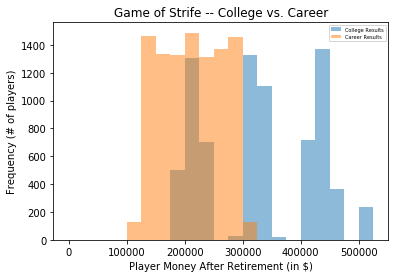

In [5]:
bins = range(0,550000,25000)

a = college_results
b = work_results
plt.hist(a, bins, alpha=0.5, label='College Results')
plt.hist(b, bins, alpha=0.5, label='Career Results')
plt.legend(loc='upper right', prop={'size':5})
plt.title("Game of Strife -- College vs. Career")
plt.xlabel("Player Money After Retirement (in $)")
plt.ylabel("Frequency (# of players)")
plt.show()


**Part B:** Use concepts from class to describe the two distributions of player cash at retirement, depending on whether or not they went to college or immediately started a career. How are the two distributions similar? How do they differ? Address characteristics like skew, modality, central tendency and spread. How could the rules of the Game of Strife account for these differences?

The distribution of player-cash at retirement for players that chose college at the start of the game follows a multimodal distribution. There are three main peaks with two discrepencies around 250,000 and 400,000; furhtermore, the distribution also appears to be symmetrically skewed, so the mean should roughly eqaul the median. As for the player-cash for those who chose career at the start of the game, the distibution is is also symmetrically skewed, but the median and average values are much less than those who chose college. The modality of the career players follows a strong unimodal pattern. One way to cancel out these differences in distributions could be to increase the potential salaries for the players who choose career, so that the spread of the data can more accurately reflect those who chose college. Furthermore, removing one of the strife tiles for 'college' players before tile 10 could possibly transform the multimodal college distribution to unimodal like the career disribution.


**Part C:**  Use your results from Part A to estimate the probability that a person would retire with at least \$300,000, if they went to college.

Suppose a player chooses 'college':
$P(R \mid College) = \frac{P(College \mid R)P(R)}{P(College)}$   (Bayes' Theorem)
- Number of players that retired with at least \$300,000 : 7496
- Number of college-players that retired with at least \$300,000 : 7463
- Given that a player chose 'college', so P(College) = 1

So, $P(R \mid College) = \frac{P(College \mid R)P(R)}{P(College)}$ 

$P(R \mid College) = \frac{\frac{7463}{7496}\frac{7496}{10000}}{1} = 0.7463$
                      
- Probability that a person that will retire with at least \$300,000 if they went to college is about 7463/10000 , or , **74.63%**.

**Part D:** The United States [Bureau of Labor Statistics](https://www.bls.gov/news.release/hsgec.nr0.htm) has found that approximately 66.7% of students go to college. Suppose players of the Game of Strife choose to go to college at the beginning of the game with this probability of $P(\text{college}) = 0.667$.

Use your two ensembles of games from Part A to estimate the probability that an individual, whose college education status is unknown, will retire in the Game of Strife with at least \$300,000. State any relevant probability laws, theorems or rules that you use, and show all calculations.

Let R be the event that a person retires with at least \$300,000
if P(College) = 0.667, then the probability someone does not go to college (chooses 'career') is:
- P(Career) = 1 - P(College)    (Compliment Law)
             = .333

$P(R) = P(R \mid Career)P(Career) + P(R \mid College)P(College)$  (Total Law of Probability)

We calculated P(R \mid College) in part C to be 74.63\% and we found P(College) and P(Career) to be 0.667 and 0.333 respecitvely. In order to calculate P(R) we must lastly calculate P(R \mid Career).

P(R $\mid$ Career):
- Number of career-players that retired with at least \$300,000 : ~20
- Number of career-players : 10,000
- P(R $\mid$ Career) = 20/10000 , or 0.2%

So, P(R) = (2/1000)(1/3) + (7463/10000)(2/3)
         = 0.4982 , or , **49.82%**


**Part E:** Let's see how important the Strife tiles are in affecting a player's final money. What is the probability that a player ends the game with at least \$300,000 in cash if they landed on at least one Strife square? You may want to modify your previous codes to run additional simulations for this part. Use the same method as Part D to address the proportion of players who begin by going to college versus starting a career.

Let R be the event that a player retired with at least \$300,000
Let S be the event that a player has has landed on at least one strife square by the time they retire.
**Note** The work done to calculate this data was implemented my code from Part A.
P(R $\mid$ S) = P(S $\mid$ R)P(R) / P(S)    (Bayes' Theorem)

We've already calculated P(R) in Part D to be 0.50066. Now we just need to solve for $P(S \mid R)$ and $P(S)$. 

$P(S \mid R)$:   (Implemented in code from part A)
- Number of people that retired with at least \$300,000 that landed on at least 1 strife = 6472
- Number of people that retired with at least \$300,000 = 7504
- Probability of player landing on at least 1 strife tile, given player retired with at least \$300,000  =  6472/7504

$P(S) = P(S \mid Career)P(Career) + P(S \mid College)P(College)$  (Total Law of Probability)
- P(S) = (2895/10000)(1/3) + (8632/10000)(2/3)
- P(S) = 0.0965 + 0.5754666667 = 0.6719666667

$So, P(R \mid S) = \frac{P(S \mid R)P(R)}{P(S)}$
- P(R $\mid$ S) = (6472/7504)(0.50066) / (0.6719666667)
- P(R $\mid$ S) = 0.6426001878 , or, **64.26%**


<br>

---
[Back to top](#top)
<a id='p2'></a>

### [30 points] Problem 2: Sonic or Tails?

<img src="http://www.cs.colorado.edu/~tonyewong/home/resources/hedgehog_coin.jpg" style="width: 500px;"/>

In the file `flipadelphia.csv` you will find the results of an experiment that was conducted by Amy, the famous hedgehog data scientist, as she was flipping a coin one sunny day in a meadow. This is no ordinary coin, however: this coin has on one side Sonic, and on the other side Tails! The two sides of this coin are above, and at [this link](http://www.cs.colorado.edu/~tonyewong/home/resources/hedgehog_coin.jpg).

In Amy's experiment she repeatedly flipped the coin until it came up Sonic. After each trial, she recorded her observed value for $X=$ the number of flips required to see the first Sonic. The results are stored in `flipadelphia.csv`.

Amy has a lot of coins for performing cool data science experiments, and these coins have different biases (not all unique). Amy is a forgetful hedgehog, so she isn't sure which coin she was flipping. Her coins have biases of $p_S=.2, .3, .4, .5, .6, .7$ and $.8$, where $p_S$ is the probability of any given flip coming up Sonic.

**Part A:** Read in the data set and make a frequency histogram of the data. Be sure to label your axes appropriately, and center your bins above the integer numbers of flips (0, 1, 2, etc...). What is the name of the distribution for the random variable that Amy observed and recorded in her data table?

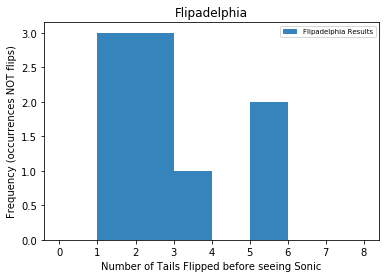

In [6]:
from numpy import genfromtxt
my_data = genfromtxt('flipadelphia.csv', skip_header=1)
bins = range(0,9,1)

a = my_data
plt.hist(a, bins, alpha=0.9, label='Flipadelphia Results')
plt.legend(loc='upper right', prop={'size':7})
plt.title("Flipadelphia")
plt.xlabel("Number of Tails Flipped before seeing Sonic")
plt.ylabel("Frequency (occurrences NOT flips)")
plt.show()

The distribution of the random varibale that Amy observed and recorded in her data table is called a geometric distribution, where Amy recorded the number of trials requred to see one success (Sonic).

**Part B:** Use the distribution that you identified in Part A to determine $P(X=n \mid p_S=0.5)$, the probability that Amy would observe the first Sonic flip on the $n$-th flip, assuming that the coin is fair ($p_S=0.5$), for each of the $n$ from her 10 trials in her data set. Then, combine these to find the overall *likelihood* that she would observe her entire data set, assuming that the coin was fair. That is, estimate $P(\text{data} \mid p_S=0.5)$. Be sure to note any assumptions you make about how the outcome of one trial relates to the outcomes of the others.

If it helps to have some mathematical notation, consider that Amy's data set consists of the results of all 10 of her trials: $$\text{data} = (X_1 = n_1) \cap (X_2 = n_2) \cap \ldots (X_{10} = n_{10})$$

$P(X=n \mid p_S=0.5) = \frac{1}{2}^{n}$ = The probability that Amy observes the first sonic flip on the $n^{th}$ flip, assuming the coin is fair. 

$P(\text{data} \mid p_S=0.5)$  (events are independent of each other ... P(A $\cap$ B)=P(A)P(B)). So,
$P(\text{data} \mid p_S=0.5)$ = $\frac{1}{2}^{5} * \frac{1}{2}^{1} * \frac{1}{2}^{5} * \frac{1}{2}^{2} * \frac{1}{2}^{2} * \frac{1}{2}^{3} * \frac{1}{2}^{2} * \frac{1}{2}^{1} * \frac{1}{2}^{1}$
= $\frac{1}{8,388,608} = $**0.00000011920929**

**Part C:** Suppose before we observed Amy's data set, we believe that each of the seven possible coin biases occur with equal probability, $P(p_S)$. This is called the _prior distribution_ for the coin bias, $p_S$, because we have not yet taken into account Amy's data set.
* Now, estimate the probability of each possible bias, given the data: $P(p_S \mid \text{data})$.  This is called the _posterior distribution_ for the coin bias, because it is our assessment of the coin's bias _after_ we have accounted for Amy's data.
* Make a line plot of the bias along x-axis versus the posterior probability of that bias along the y-axis, and be sure to label your axes. 
* Comment on your plot. What appears to be the most probable value for the bias, $p_S$? This is called the _maximum a posteriori_ estimate, because it maximizes the posterior distribution and sounds very, *very* fancy.

$P(p_S \mid \text{data}) = \frac{P(\text{data} \mid p_S)P(p_S)}{P(\text{data})}$  (By Bayes' Theorem)

$P(p_S \mid \text{data})$ = $\frac{{p_S}(1-p_S)^{n-1}(\frac{1}{7})}{P(\text{data} \mid p_{1})P(p_{1}) + P(\text{data} \mid p_{2})P(p_{2}) ... P(\text{data} \mid p_{7})}$

$P(\text{data}) = (.2)^{23} + (.3)^{23} +(.4)^{23} + (.5)^{23} +(.6)^{23} + (.7)^{23} +(.8)^{23}$

$P(data) = 0.0061846628$

$P(p_S \mid \text{data}) = \frac{P(\text{data} \mid p_s)}{.0432926395}$

Text(0.5, 1.0, 'Singular Triangular Distribution of Coin Flips')

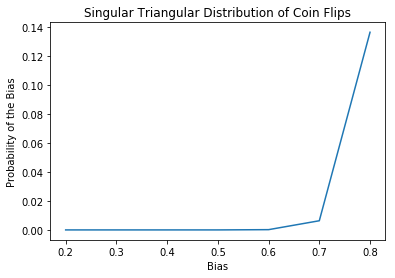

In [7]:
def solve(bias):
    data = bias**23
    ans = data / .0432926395
    return ans
bias = [.2, .3, .4, .5, .6, .7, .8]
prob = []
for i in range(7):
    x = solve(bias[i])
    prob.append(x)
    
plt.plot(bias, prob)
plt.xlabel("Bias")
plt.ylabel("Probability of the Bias")
plt.title("Singular Triangular Distribution of Coin Flips")


**Part D:** Now suppose the prior probability distribution of the coins is not uniform. Namely, suppose these probabilities follow a ***triangular distribution***, centered at $p_S=0.5$:
$$P(p_S = p) = \begin{cases} mp & p \leq 0.5 \\ m(1-p) & p > 0.5 \end{cases}$$

Determine what value the constant $m$ should have in order to make $P(p_S = p)$ is a valid probability mass function. Remember, $p_S \in \{.2, .3, \ldots , .7, .8\}$ and is discrete.

$$\sum_{.2}^{.5} mp + \sum_{.6}^{.8} m(1-p) = 1$$ to be a valid pmf


$(.2m)+(.3m)+(.4m)+(.5m)+(m(1-.6))+(m(1-.7))+(m(1-.8)) = 1$

$2.3m= 1$

$m = \frac{1}{2.3} = $**0.4347826087**



**Part E:** Compare, using words, the triangular prior distribution (this part) and the uniform prior distribution (from Part C).  What does each represent in terms of our _prior_ knowledge of the coin bias?

The triangular distribution in this from this part factors in weights that are non uniform, unlike the prior distribution from part C. In terms of prior knowledge, this means that not all coins are equally likely to be drawn in this case. 

**Part F:** Modify your calculation of the posterior distribution from Part C to use the new triangular prior distribution from Part D. Make a plot of the results that includes both posterior distribution using the uniform prior (from Part C) and the posterior distribution using the triangular prior (from Part D) in the same figure panel. Be sure to label your axes and include a legend.

Text(0.5, 1.0, 'Triangular vs. Uniform Distribution')

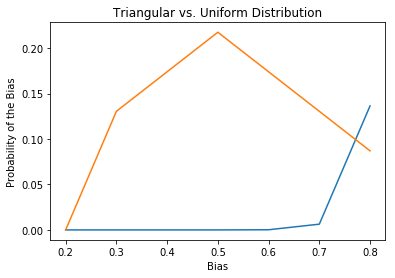

In [8]:
bias = [.2, .3, .4, .5, .6, .7, .8]
def solve1(bias):
    data = bias/2.3
    return data
def solve2(bias):
    data = 1-bias
    ans = data/2.3
    return ans
prob1 = [0,0,0,0,0,0,0]
for i in range(1,4):
    x = solve1(bias[i])
    prob1[i] =x
for j in range(4,7):
    z = solve2(bias[j])
    prob1[j] =z
    
def solve(bias):
    data = bias**23
    ans = data / .0432926395
    return ans
prob = []
for i in range(7):
    x = solve(bias[i])
    prob.append(x)
    
plt.plot(bias, prob)
plt.plot(bias, prob1)
plt.xlabel("Bias")
plt.ylabel("Probability of the Bias")
plt.title("Triangular vs. Uniform Distribution")

**Part G:** Comment on the effect of your choice of different prior distribution on your posterior inference for the most probable coin bias.

By choosing a non-uniform prior distribution, we've created a distribution of biases that is bimodal, with a gap at 0.5. The effect on our posterior inference is that the largest bias is no longer most probable. The most probable bias is at the peak of the triangular distribution as evenly distributed coin (bias = 0.5). The "maximum" value is when bias = 0.8, which is less likely to occur while using this triangular distribution method.  

<br>

---
[Back to top](#top)
<a id='bot'></a>